# Rice_Prediction_CNN_ThresholdedReLU

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.layers import ThresholdedReLU
from tensorflow.keras.callbacks import EarlyStopping
import splitfolders

## Split_Folder

In [3]:
input_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Rice_Image_Dataset'
output_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img'

In [4]:
#splitfolders.fixed(input=input_dir,output=output_dir,fixed=(500,100,100),seed=1337)

## Data Preparation

In [5]:
dataGen=ImageDataGenerator(rescale=1/255)

In [6]:
train_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\train'
test_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\test'
val_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\val'

In [7]:
train_itt=dataGen.flow_from_directory(directory=train_dir,batch_size=64,target_size=(100,100))
test_itt=dataGen.flow_from_directory(directory=test_dir,batch_size=64,target_size=(100,100))
val_itt=dataGen.flow_from_directory(directory=val_dir,batch_size=64,target_size=(100,100))

Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


## Model

In [8]:
model=Sequential()

In [9]:
model.add(Conv2D(32,(3,3),activation=ThresholdedReLU(),input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation=ThresholdedReLU()))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation=ThresholdedReLU()))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation=ThresholdedReLU()))
model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
early_stop= EarlyStopping(monitor='val_loss',patience=3,mode='min',verbose=False)

In [11]:
model.fit(train_itt,validation_data=val_itt,epochs=50,callbacks=early_stop)

Epoch 1/50
40/40 [==============================] - 44s 1s/step - loss: 1.6095 - accuracy: 0.1964 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 2/50
40/40 [==============================] - 39s 978ms/step - loss: 1.6095 - accuracy: 0.1956 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 3/50
40/40 [==============================] - 39s 974ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 4/50
40/40 [==============================] - 39s 982ms/step - loss: 1.6095 - accuracy: 0.1876 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 5/50
40/40 [==============================] - 39s 980ms/step - loss: 1.6095 - accuracy: 0.1952 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 6/50
40/40 [==============================] - 40s 1s/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 7/50
40/40 [==============================] - 39s 980ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch

<AxesSubplot:>

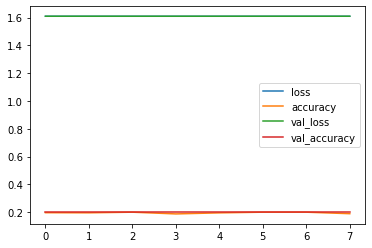

In [12]:
losses = pd.DataFrame(model.history.history)
losses.plot()

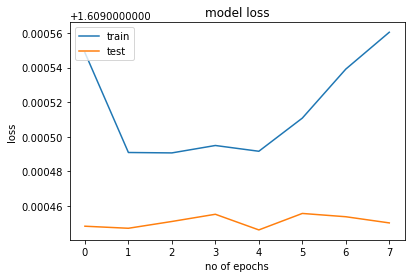

In [13]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

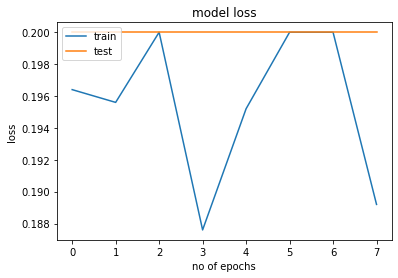

In [14]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [15]:
#model.save('weather_classification_model.h5')

In [16]:
class_label= test_itt.class_indices
class_label

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}